TP gestion dynamique d'un serveur informatique dans un data center : ON, ON/OFF, et DVFS (dynamic voltage frequency scaling)  pour analyser le compromis compromis energie/performance


On propose d'étudier différentes stratégies afin de les comparer en fonction de la puissance consommée et le temps de réponse.
\begin{itemize}
\item Stratégie 1 ON : on n'éteint pas le serveur physique
\item Stratégie 2 ON/OFF : on éteint le serveur physique pendant les phases idle, et on le rallume dès qu'un client arrive, mais avec un temps d'allumage non nul
\item Stratégie 3  DVFS : la fréquence du processeur change en fonction du nombre de clients à traiter (
\end{itemize}





Question 1: On fixe un temps d'allumage à 0.125,  et on fait varier $\lambda=1,2,4,6, 8, 10, 12$.  Donnez les temps de réponse ainsi que la puissance consommée
pour les stratégies 1 et 2.  

ro1=  [0.06666667 0.13333333 0.26666667 0.4        0.53333333 0.66666667
 0.8       ]
ros=  [0.17037037 0.30666667 0.51111111 0.65714286 0.76666667 0.85185185
 0.92      ]
R1=  [0.07142857 0.07692308 0.09090909 0.11111111 0.14285714 0.2
 0.33333333]
P1=  [ 66.  77.  99. 121. 143. 165. 187.]
R2=  [0.19642857 0.20192308 0.21590909 0.23611111 0.26785714 0.325
 0.45833333]
P2=  [ 37.48148148  67.46666667 112.44444444 144.57142857 168.66666667
 187.40740741 202.4       ]


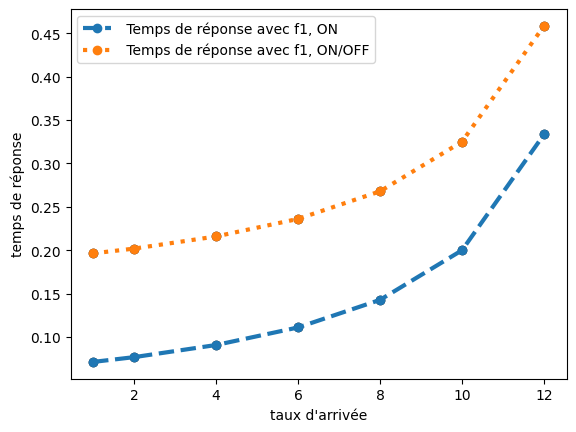

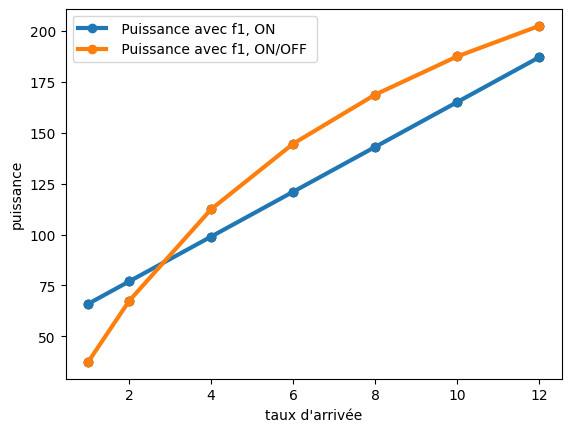

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f1=1.8
cpi=2
ncoeur=4
pOn1=55*ncoeur
alfa=0.25
pstatic1=55*ncoeur*alfa
tailleReq=240*pow(10,6)
mu1=ncoeur*f1*pow(10,9)/(cpi*tailleReq)
tempsServ=1/mu1
tempsA=0.125
lamda=np.array([1,2,4,6,8,10,12])
P1_1=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0])
R1_1=np.array([0.0,0.0, 0.0, 0.0,0.0,0.0,0.0])
P2_1=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0])
R2_1=np.array([0.0,0.0, 0.0, 0.0,0.0,0.0,0.0])
ro1=np.array([0.0,0.0, 0.0, 0.0,0.0,0.0,0.0])
ros=np.array([0.0,0.0, 0.0, 0.0,0.0,0.0,0.0])
bouclelam=7

for i in range(bouclelam):
        ro1[i]=lamda[i]/mu1
        if (ro1[i]<1) :
            #Donnez la valeur du temps de réponse pour la stratégie ON
          R1_1[i] = 1/(mu1-lamda[i])

            # Donnez la valeur de la puissance  pour la stratégie ON

          P1_1[i] = pstatic1 + ro1[i]*(pOn1 - pstatic1)

            # Donnez la valeur de ros pour la strategie ON/OFF

          ros[i]= (lamda[i]*tempsA + ro1[i])/(lamda[i]*tempsA + 1)
          if (ros[i]<1) :
                # Donnez la valeur du temps de réponse pour la stratégie ON/OFF

            R2_1[i] = 1/(mu1-lamda[i]) + (2*tempsA + lamda[i]*2*tempsA**2)/(2*(1+lamda[i]*tempsA))

                # Donnez la valeur de la puissance  pour la stratégie ON/OFF
            P2_1[i] = ros[i]*pOn1


print("ro1= ", ro1)
print("ros= ", ros)
print("R1= ", R1_1)
print("P1= ", P1_1)
print("R2= ", R2_1)
print("P2= ", P2_1)

plt.scatter(lamda, R1_1, color='black')
plt.xlabel("taux d'arrivée")
plt.ylabel("temps de réponse")
plt.plot(lamda, R1_1 , "o--",  label=" Temps de réponse avec f1, ON",linewidth=3)

plt.scatter(lamda, R2_1, color='black')
plt.plot(lamda, R2_1 , "o:",  label=" Temps de réponse avec f1, ON/OFF",linewidth=3)

plt.legend()
plt.savefig('fig_quest1_1.pdf')

plt.show()

plt.xlabel("taux d'arrivée")
plt.ylabel("puissance")
plt.scatter(lamda, P1_1, color='black')
plt.plot(lamda, P1_1 , "o-",  label=" Puissance avec f1, ON ",linewidth=3)

plt.scatter(lamda, P2_1, color='black')
plt.plot(lamda, P2_1 , "o-",  label=" Puissance avec f1, ON/OFF ",linewidth=3)


plt.legend()
plt.savefig('fig_quest1_2.pdf')
plt.show()




Question 2 : On fixe $\lambda=2$, et on fait varier le temps d'allumage E(A)=0.05,0.1,0.15,0.2,0.25.  Donnez les temps de réponse ainsi que la puissance consommée
pour les stratégies 1 et 2.

R1= 0.07692307692307693
P1= 77.0


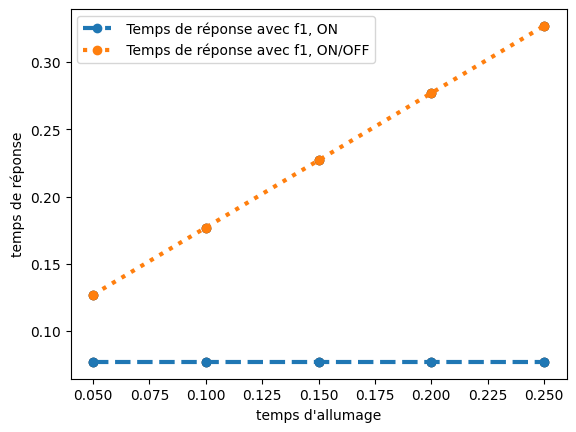

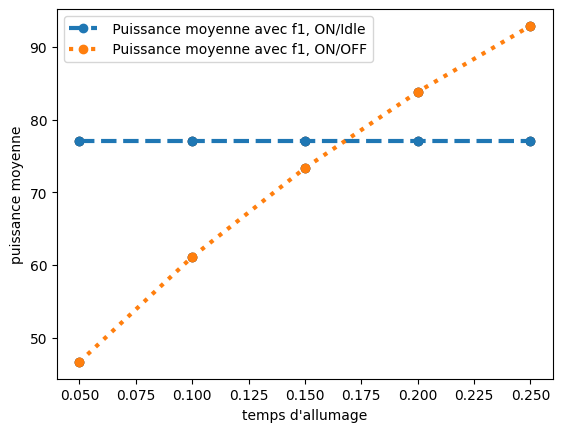

In [ ]:
boucletempsA=5
lamda=2
P2_1=np.array([0.0,0.0,0.0,0.0,0.0])
R2_1=np.array([0.0,0.0, 0.0, 0.0,0.0])
rho1=lamda/mu1
R1=1.0/(mu1-lamda)

P1=pstatic1+(pOn1-pstatic1)*rho1
tempsA=np.array([0.05,0.1,0.15,0.2,0.25])

for i in range(boucletempsA):
        # Donnez la valeur de rhos
        rhos= (lamda*tempsA[i] + rho1)/(lamda*tempsA[i] + 1)
        if (rhos<1) :
            # Donnez la valeur du temps de réponse pour la stratégie ON/OFF
            R2_1[i]= 1/(mu1-lamda) + (2*tempsA[i] + lamda*2*tempsA[i]**2)/(2*(1+lamda*tempsA[i]))
            # Donnez la valeur de la puissance pour la stratégie ON/OFF
            P2_1[i]= rhos*pOn1

print("R1=", R1)
print("P1=", P1)





R1_a=np.array([R1,R1, R1, R1,R1])
plt.scatter(tempsA, R1_a, color='black')
plt.xlabel("temps d'allumage")
plt.ylabel("temps de réponse")
plt.plot(tempsA, R1_a , "o--",  label=" Temps de réponse avec f1, ON",linewidth=3)

plt.scatter(tempsA, R2_1, color='black')
plt.plot(tempsA, R2_1 , "o:",  label=" Temps de réponse avec f1, ON/OFF",linewidth=3)

plt.legend()
plt.savefig('fig_quest2_1.pdf')

plt.show()


P1_1=np.array([P1,P1, P1, P1,P1])
plt.scatter(tempsA, P1_1, color='black')
plt.xlabel("temps d'allumage")
plt.ylabel("puissance moyenne")
plt.plot(tempsA, P1_1 , "o--",  label=" Puissance moyenne avec f1, ON/Idle",linewidth=3)

plt.scatter(tempsA, P2_1, color='black')
plt.plot(tempsA, P2_1 , "o:",  label=" Puissance moyenne avec f1, ON/OFF",linewidth=3)

plt.legend()
plt.savefig('fig_quest2_2.pdf')

plt.show()




Question 3 (3-1) : similaire à la question 1, sauf que  l'on suppose que  par coeur : $f_2=2.4 GHZ$,  et $P_{On}= 90 Watts$ .
  

ro2=  [0.05 0.1  0.2  0.3  0.4  0.5  0.6 ]
ros2=  [0.15555556 0.28       0.46666667 0.6        0.7        0.77777778
 0.84      ]
R1= [0.05263158 0.05555556 0.0625     0.07142857 0.08333333 0.1
 0.125     ]
P1= [103.5 117.  144.  171.  198.  225.  252. ]
R2= [0.17763158 0.18055556 0.1875     0.19642857 0.20833333 0.225
 0.25      ]
P2= [ 56.  100.8 168.  216.  252.  280.  302.4]


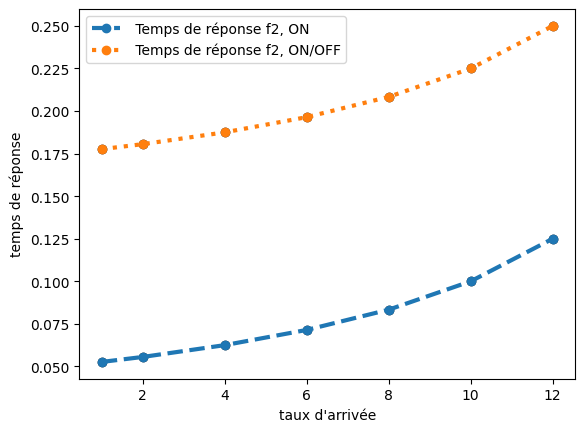

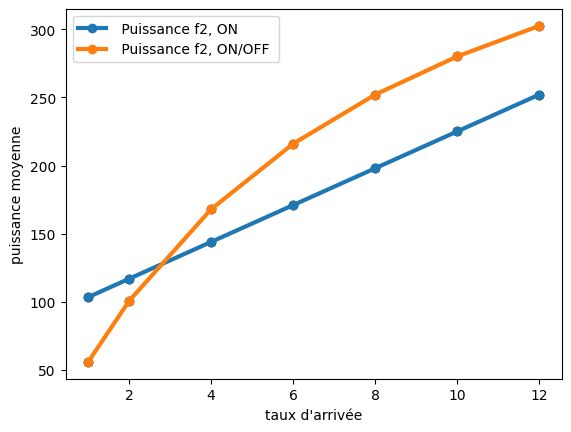

In [ ]:
f2=2.4
cpi=2

pOn2=90*ncoeur
alfa=0.25
tempsA=0.125
lamda=np.array([1,2,4,6,8,10,12])
pstatic2=90*ncoeur*alfa
P1_2=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0])
R1_2=np.array([0.0,0.0, 0.0, 0.0,0.0,0.0,0.0])
P2_2=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0])
R2_2=np.array([0.0,0.0, 0.0, 0.0,0.0,0.0,0.0])
ro2=np.array([0.0,0.0, 0.0, 0.0,0.0,0.0,0.0])
ros2=np.array([0.0,0.0, 0.0, 0.0,0.0,0.0,0.0])

tailleReq=240*pow(10,6)
mu2=ncoeur*f2*pow(10,9)/(cpi*tailleReq)
tempsServ=1/mu2
tempsA=0.125

for i in range(bouclelam):
        ro2[i]=lamda[i]/mu2
        if (ro2[i]<1) :
            #Donnez la valeur du temps de réponse pour la stratégie ON
          R1_2[i] = 1/(mu2-lamda[i])

            # Donnez la valeur de la puissance  pour la stratégie ON

          P1_2[i] = pstatic2 + ro2[i]*(pOn2 - pstatic2)

            # Donnez la valeur de ros pour la strategie ON/OFF

          ros2[i]= (lamda[i]*tempsA + ro2[i])/(lamda[i]*tempsA + 1)
          if (ros2[i]<1) :
                # Donnez la valeur du temps de réponse pour la stratégie ON/OFF

            R2_2[i] = 1/(mu2-lamda[i]) + (2*tempsA + lamda[i]*2*tempsA**2)/(2*(1+lamda[i]*tempsA))

                # Donnez la valeur de la puissance  pour la stratégie ON/OFF
            P2_2[i] = ros2[i]*pOn2


print("ro2= ", ro2)
print("ros2= ", ros2)
print("R1=", R1_2)
print("P1=", P1_2)
print("R2=", R2_2)
print("P2=", P2_2)


plt.scatter(lamda, R1_2, color='black')
plt.xlabel("taux d'arrivée")
plt.ylabel("temps de réponse")
plt.plot(lamda, R1_2 , "o--",  label=" Temps de réponse f2, ON",linewidth=3)

plt.scatter(lamda, R2_2, color='black')
plt.plot(lamda, R2_2 , "o:",  label=" Temps de réponse f2, ON/OFF",linewidth=3)

plt.legend()
plt.savefig('fig_quest3_1.pdf')
plt.show()

plt.scatter(lamda, P1_2, color='black')
plt.plot(lamda, P1_2 , "o-",  label=" Puissance f2, ON ",linewidth=3)

plt.scatter(lamda, P2_2, color='black')
plt.plot(lamda, P2_2 , "o-",  label=" Puissance f2, ON/OFF ",linewidth=3)

plt.xlabel("taux d'arrivée")
plt.ylabel("puissance moyenne")
plt.legend()
plt.savefig('fig_quest3_2.pdf')
plt.show()





Question 3 (3-2): similaire à la question 2, sauf que l'on  suppose que $f_2=2.4 GHZ$,  et $P_{On}= 90 Watts$ par coeur et que le temps d'allumage varie :0.125,0.250,0.5,1,2.


R1= 0.05555555555555555
P1= 117.0
R2= [0.18055556 0.30555556 0.55555556 1.05555556 2.05555556]
P2= [100.8 144.  198.  252.  295.2]


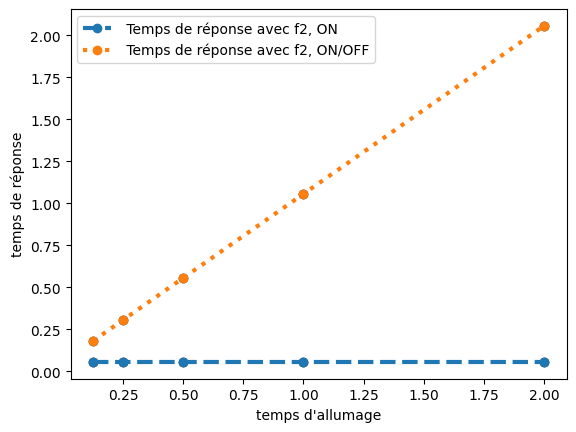

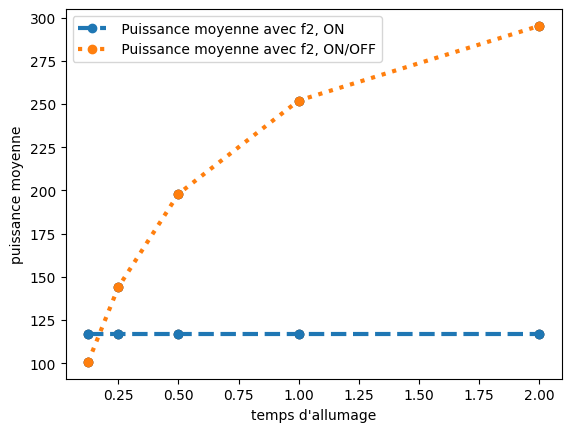

In [ ]:
boucletempsA=5
lamda=2
P2=np.array([0.0,0.0,0.0,0.0,0.0])
R2=np.array([0.0,0.0, 0.0, 0.0,0.0])
rho2=lamda/mu2
R1=1.0/(mu2-lamda)
P1=pstatic2+(pOn2-pstatic2)*rho2
#tempsA=np.array([0.05,0.1,0.15,0.2,0.25])
tempsA=np.array([0.125,0.250,0.5,1,2])

for i in range(boucletempsA):
        # Donnez la valeur de rhos
        rhos= (lamda*tempsA[i] + rho2)/(lamda*tempsA[i] + 1)
        if (rhos<1) :
            # Donnez la valeur du temps de réponse pour la stratégie ON/OFF
            R2[i]= 1/(mu2-lamda) + (2*tempsA[i] + lamda*2*tempsA[i]**2)/(2*(1+lamda*tempsA[i]))
            # Donnez la valeur de la puissance pour la stratégie ON/OFF
            P2[i]= rhos*pOn2

print("R1=", R1)
print("P1=", P1)
print("R2=", R2)
print("P2=", P2)

R1_a=np.array([R1,R1, R1, R1,R1])
plt.scatter(tempsA, R1_a, color='black')
plt.xlabel("temps d'allumage")
plt.ylabel("temps de réponse")
plt.plot(tempsA, R1_a , "o--",  label=" Temps de réponse avec f2, ON",linewidth=3)

plt.scatter(tempsA, R2, color='black')
plt.plot(tempsA, R2 , "o:",  label=" Temps de réponse avec f2, ON/OFF",linewidth=3)

plt.legend()
plt.savefig('fig_quest3_3.pdf')

plt.show()

P1_1=np.array([P1,P1, P1, P1,P1])
plt.scatter(tempsA, P1_1, color='black')
plt.xlabel("temps d'allumage")
plt.ylabel("puissance moyenne")
plt.plot(tempsA, P1_1 , "o--",  label=" Puissance moyenne avec f2, ON",linewidth=3)

plt.scatter(tempsA, P2, color='black')
plt.plot(tempsA, P2 , "o:",  label=" Puissance moyenne avec f2, ON/OFF",linewidth=3)

plt.legend()
plt.savefig('fig_quest3_4.pdf')

plt.show()






In [ ]:
#Question 4 : On considère la stratégie 3,   en faisant varier la fréquence de  $f_1=1.8 GHZ$   à  $f_2=2.4 GHZ$ et les valeurs des pstate sont
#$p_1=55Watts$,  et $p_2=90Watts$, et $s_1=10$.  En faisant varier  $\lambda=1,2,4,6, 8, 10, 12$,
#donnez les temps de réponse et la puissance moyenne consommée.


SyntaxError: ignored

In [ ]:
import numpy as np
bouclelam = 7
P3=np.zeros(7)
L3=np.zeros(7)
R3=np.zeros(7)
lamda=np.array([1,2,4,6,8,10,12])
ro1=np.array([0.0,0.0, 0.0, 0.0,0.0,0.0,0.0])
ro2=np.array([0.0,0.0, 0.0, 0.0,0.0,0.0,0.0])
pOn1=55*ncoeur
alfa=0.25
pstatic1=55*ncoeur*alfa
pOn2=90*ncoeur
somme=1
p0=0
s_1=10

for i in range(bouclelam) :
    # donnez la valeur de ro1[i]
    ro1[i]= lamda[i]/mu1
    # donnez la valeur de ro2[i]
    ro2[i]=lamda[i]/mu2
    if (ro1[i]<1) and (ro2[i]<1) :
      C1=(1-pow(ro1[i],s_1+1))/(1-ro1[i])
      C2=pow(ro2[i],s_1+1)/(1-ro2[i])
      # donnez la valeur de  p0
      p0= 1/(C1 + pow(ro1/ro2,s1)*C2)
      derivC1=((-(s1+1)*pow(ro1[i],s1))+s1*pow(ro1[i],s1+1)+1)/(pow(1-ro1[i],2))
      derivC2=(pow(ro2[i],s1)*(s1+1)-s1*pow(ro2[i],s1+1))/(pow(1-ro2[i],2))
      # donnez la valeur de  L3[i]
      L3[i] = np.sum(p0*(ro1[i]*derivC1 + ro2[i]*derivC2*(ro1[i]**s1)/(ro2[i]**s1)))
      #L3[i]=p0*(ro1[i]*derivC1 + (pow(ro1[i],s1)/pow(ro2[i],s1))*ro2[i]*derivC2)
      # donnez la valeur de  R3[i]
      R3[i]= L3[i]/lamda[i]
      # donnez la valeur de  P3[i]
      P3[i] = np.sum(pstatic1 + p0*((pOn1-pstatic1)*(C1-1)+(pOn2-pstatic1)*C2*pow(ro1[i],s1)/pow(ro2[i],s1)))



print("R3=", R3)
print("P3=", P3)



plt.scatter(lamda, R3, color='black')
plt.xlabel("taux d'arrivée")
plt.ylabel("temps de réponse")
plt.plot(lamda, R3 , "o--",  label=" Temps de réponse dvfs",linewidth=3)

plt.legend()
plt.savefig('fig_quest4_1.pdf')

plt.show()


plt.scatter(lamda, P3, color='black')
plt.plot(lamda, P3 , "o:",  label=" puissance moyenne avec dvfs",linewidth=3)

plt.legend()
plt.savefig('fig_quest4_2.pdf')

plt.show()



<ipython-input-13-1191a65d01c7>:26: RuntimeWarning: invalid value encountered in divide
  p0= 1/(C1 + pow(ro1/ro2,s1)*C2)


TypeError: ignored

In [ ]:
Question 5 : On considère la stratégie 3,  on fixe tous les paramètres sauf le seuil $s_1$ que l'on fait varier.
Pour chaque valeur de $\lambda$ (2, 6 et 12) , faire une courbe qui montre le temps de réponse et la
puissance consommée en fonction du seuil $s_1$  (variant de 1 à 15).

In [ ]:
Question 6 :  On veut comparer  la stratégie 3,  pour  $s_1=2$  et $s_1=8$,   avec la  stratégie 1   où  on prend soit  $f_1=1 GHZ$ , soit  $f_2=2.4 GHZ$ .  Donnez une figure pour le temps de réponse en fonction de lamda,  en  visualisant 4 courbes : stratégie 3   $s_1=1$  et $s_1=10$,  et stratégie 1   $f_1=1 GHZ$ , soit  $f_2=2.4 GHZ$.   Même chose pour les puissances.